### DATA DICTIONARY:

***CUST_ID:*** Credit card holder ID

***BALANCE:*** Monthly average balance (based on daily balance averages)

***BALANCE_FREQUENCY:*** Ratio of last 12 months with balance

***PURCHASES:*** Total purchase amount spent during last 12 months

***ONEOFF_PURCHASES:*** Total amount of one-off purchases

***INSTALLMENTS_PURCHASES:*** Total amount of installment purchases

***CASH_ADVANCE:*** Total cash-advance amount

***PURCHASES_ FREQUENCY:*** Frequency of purchases (Percent of months with at least one purchase)

***ONEOFF_PURCHASES_FREQUENCY:*** Frequency of one-off-purchases PURCHASES_INSTALLMENTS_FREQUENCY: Frequency of installment purchases

***CASH_ADVANCE_ FREQUENCY:*** Cash-Advance frequency

***AVERAGE_PURCHASE_TRX:*** Average amount per purchase transaction

***CASH_ADVANCE_TRX:*** Average amount per cash-advance transaction

***PURCHASES_TRX:*** Average amount per purchase transaction

***CREDIT_LIMIT:*** Credit limit

***PAYMENTS:*** Total payments (due amount paid by the customer to decrease their statement balance) in the period

***MINIMUM_PAYMENTS:*** Total minimum payments due in the period.

***PRC_FULL_PAYMEN:*** Percentage of months with full payment of the due statement balance

***TENURE:*** Number of months as a customer

### Import Library

In [1]:
#Basic python library which need to import
import pandas as pd
import numpy as np

#Date stuff
from datetime import datetime
from datetime import timedelta

#Library for Nice graphing
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as sn
%matplotlib inline

#Library for statistics operation
import scipy.stats as stats

# Date Time library
from datetime import datetime

#Machine learning Library
import statsmodels.api as sm
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')


### Load data

In [2]:
# reading data into dataframe
credit= pd.read_csv("CC_GENERAL.csv")

### Information about data set

In [3]:
credit.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
# Find the total number of missing values in the dataframe
print ("\nMissing values :  ", credit.isnull().sum().values.sum())

# printing total numbers of Unique value in the dataframe. 
print ("\nUnique values :  \n",credit.nunique())


Missing values :   314

Unique values :  
 CUST_ID                             8950
BALANCE                             8871
BALANCE_FREQUENCY                     43
PURCHASES                           6203
ONEOFF_PURCHASES                    4014
INSTALLMENTS_PURCHASES              4452
CASH_ADVANCE                        4323
PURCHASES_FREQUENCY                   47
ONEOFF_PURCHASES_FREQUENCY            47
PURCHASES_INSTALLMENTS_FREQUENCY      47
CASH_ADVANCE_FREQUENCY                54
CASH_ADVANCE_TRX                      65
PURCHASES_TRX                        173
CREDIT_LIMIT                         205
PAYMENTS                            8711
MINIMUM_PAYMENTS                    8636
PRC_FULL_PAYMENT                      47
TENURE                                 7
dtype: int64


In [6]:
credit.shape

(8950, 18)

In [7]:
# Intital descriptive analysis of data.
credit.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


---

### a) Missing Value Treatment
       - Since there are missing values in the data so we are imputing them with median.

---

In [8]:
credit.isnull().any()

CUST_ID                             False
BALANCE                             False
BALANCE_FREQUENCY                   False
PURCHASES                           False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
CASH_ADVANCE                        False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
CREDIT_LIMIT                         True
PAYMENTS                            False
MINIMUM_PAYMENTS                     True
PRC_FULL_PAYMENT                    False
TENURE                              False
dtype: bool

In [9]:
# CREDIT_LIMIT  and MINIMUM_PAYMENTS has missing values so we need to remove with median.

credit['CREDIT_LIMIT'].fillna(credit['CREDIT_LIMIT'].median(),inplace=True)

credit['CREDIT_LIMIT'].count()


credit['MINIMUM_PAYMENTS'].median()
credit['MINIMUM_PAYMENTS'].fillna(credit['MINIMUM_PAYMENTS'].median(),inplace=True)


In [10]:
# Now again check the missing values.

credit.isnull().any()

CUST_ID                             False
BALANCE                             False
BALANCE_FREQUENCY                   False
PURCHASES                           False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
CASH_ADVANCE                        False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
CREDIT_LIMIT                        False
PAYMENTS                            False
MINIMUM_PAYMENTS                    False
PRC_FULL_PAYMENT                    False
TENURE                              False
dtype: bool

### Deriving New KPI

***1. Monthly average purchase and cash advance amount***

#### Monthly_avg_purchase

In [13]:
credit['Monthly_avg_purchase']=credit['PURCHASES']/credit['TENURE']

In [12]:
print(credit['Monthly_avg_purchase'].head(),'\n ',
credit['TENURE'].head(),'\n', credit['PURCHASES'].head())

0      7.950000
1      0.000000
2     64.430833
3    124.916667
4      1.333333
Name: Monthly_avg_purchase, dtype: float64 
  0    12
1    12
2    12
3    12
4    12
Name: TENURE, dtype: int64 
 0      95.40
1       0.00
2     773.17
3    1499.00
4      16.00
Name: PURCHASES, dtype: float64


#### Monthly_cash_advance Amount

In [13]:
credit['Monthly_cash_advance']=credit['CASH_ADVANCE']/credit['TENURE']

In [14]:
credit[credit['ONEOFF_PURCHASES']==0]['ONEOFF_PURCHASES'].count()

4302

#### 2- Purchases by type (one-off, installments)

- To find what type of purchases customers are making on credit card

In [15]:
credit.loc[:,['ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES']]

,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES
0,0.00,95.40
1,0.00,0.00
2,773.17,0.00
3,1499.00,0.00
4,16.00,0.00
...,...,...
8945,0.00,291.12
8946,0.00,300.00
8947,0.00,144.40
8948,0.00,0.00


#### Find customers ONEOFF_PURCHASES and INSTALLMENTS_PURCHASES details

In [16]:
credit[(credit['ONEOFF_PURCHASES']==0) & (credit['INSTALLMENTS_PURCHASES']==0)].shape

(2042, 20)

In [17]:
credit[(credit['ONEOFF_PURCHASES']>0) & (credit['INSTALLMENTS_PURCHASES']>0)].shape

(2774, 20)

In [18]:
credit[(credit['ONEOFF_PURCHASES']>0) & (credit['INSTALLMENTS_PURCHASES']==0)].shape

(1874, 20)

In [19]:
credit[(credit['ONEOFF_PURCHASES']==0) & (credit['INSTALLMENTS_PURCHASES']>0)].shape

(2260, 20)

***As per above detail we found out that there are 4 types of purchase behaviour in the data set. So we need to derive a categorical variable based on their behaviour***

In [20]:
def purchase(credit):
    if (credit['ONEOFF_PURCHASES']==0) & (credit['INSTALLMENTS_PURCHASES']==0):
        return 'none'
    if (credit['ONEOFF_PURCHASES']>0) & (credit['INSTALLMENTS_PURCHASES']>0):
         return 'both_oneoff_installment'
    if (credit['ONEOFF_PURCHASES']>0) & (credit['INSTALLMENTS_PURCHASES']==0):
        return 'one_off'
    if (credit['ONEOFF_PURCHASES']==0) & (credit['INSTALLMENTS_PURCHASES']>0):
        return 'istallment'

In [21]:
credit['purchase_type']=credit.apply(purchase,axis=1)

In [22]:
credit['purchase_type'].value_counts()

both_oneoff_installment    2774
istallment                 2260
none                       2042
one_off                    1874
Name: purchase_type, dtype: int64

#### 4. Limit_usage (balance to credit limit ratio ) credit card utilization
   - Lower value implies cutomers are maintaing thier balance properly. Lower value means good credit score

In [23]:
credit['limit_usage']=credit.apply(lambda x: x['BALANCE']/x['CREDIT_LIMIT'], axis=1)

In [24]:
credit['limit_usage'].head()

0    0.040901
1    0.457495
2    0.332687
3    0.222223
4    0.681429
Name: limit_usage, dtype: float64

#### 5- Payments to minimum payments ratio etc.

In [25]:
credit['PAYMENTS'].isnull().any()
credit['MINIMUM_PAYMENTS'].isnull().value_counts()

False    8950
Name: MINIMUM_PAYMENTS, dtype: int64

In [26]:
credit['MINIMUM_PAYMENTS'].describe()

count     8950.000000
mean       844.906767
std       2332.792322
min          0.019163
25%        170.857654
50%        312.343947
75%        788.713501
max      76406.207520
Name: MINIMUM_PAYMENTS, dtype: float64

In [27]:
credit['payment_minpay']=credit.apply(lambda x:x['PAYMENTS']/x['MINIMUM_PAYMENTS'],axis=1)

In [28]:
credit['payment_minpay']

0       1.446508
1       3.826241
2       0.991682
3       0.000000
4       2.771075
          ...   
8945    6.660231
8946    0.883197
8947    0.986076
8948    0.942505
8949    0.715439
Name: payment_minpay, Length: 8950, dtype: float64

####  Extreme value Treatment
- Since there are variables having extreme values so I am doing log-transformation on the dataset to remove outlier effect 

In [29]:
# log tranformation
cr_log=credit.drop(['CUST_ID','purchase_type'],axis=1).applymap(lambda x: np.log(x+1))

In [30]:
cr_log.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_avg_purchase,Monthly_cash_advance,limit_usage,payment_minpay
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,...,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,6.161637,0.619940,4.899647,3.204274,3.352403,3.319086,0.361268,0.158699,0.270072,0.113512,...,1.894731,8.094825,6.624540,5.916079,0.117730,2.519680,3.050877,2.163970,0.296081,1.357600
std,2.013303,0.148590,2.916872,3.246365,3.082973,3.566298,0.277317,0.216672,0.281852,0.156716,...,1.373856,0.819629,1.591763,1.169929,0.211617,0.130367,2.002823,2.429741,0.250303,0.940149
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,3.931826,0.000000,0.018982,0.000000,1.945910,0.000000,0.000000,0.000000,0.000000
25%,4.861995,0.635989,3.704627,0.000000,0.000000,0.000000,0.080042,0.000000,0.000000,0.000000,...,0.693147,7.378384,5.951361,5.146667,0.000000,2.564949,1.481458,0.000000,0.040656,0.648817
50%,6.773521,0.693147,5.892417,3.663562,4.499810,0.000000,0.405465,0.080042,0.154151,0.000000,...,2.079442,8.006701,6.754489,5.747301,0.000000,2.564949,3.494587,0.000000,0.264455,1.109459
75%,7.628099,0.693147,7.013133,6.360274,6.151961,7.016449,0.650588,0.262364,0.559616,0.200671,...,2.890372,8.779711,7.550732,6.671670,0.133531,2.564949,4.587295,4.606022,0.540911,1.953415
max,9.854515,0.693147,10.800403,10.615512,10.021315,10.760839,0.693147,0.693147,0.693147,0.916291,...,5.883322,10.308986,10.834125,11.243832,0.693147,2.564949,8.315721,8.276166,2.827902,8.830767


In [31]:
col=['BALANCE','PURCHASES','CASH_ADVANCE','TENURE','PAYMENTS','MINIMUM_PAYMENTS','PRC_FULL_PAYMENT','CREDIT_LIMIT']
cr_pre=cr_log[[x for x in cr_log.columns if x not in col ]]

In [32]:
cr_pre.columns

Index(['BALANCE_FREQUENCY', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'Monthly_avg_purchase',
       'Monthly_cash_advance', 'limit_usage', 'payment_minpay'],
      dtype='object')

In [33]:
cr_log.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE', 'Monthly_avg_purchase', 'Monthly_cash_advance', 'limit_usage',
       'payment_minpay'],
      dtype='object')

### Insights from KPIs

#### Average payment_minpayment ratio for each purchse type.

In [34]:
x=credit.groupby('purchase_type').apply(lambda x: np.mean(x['payment_minpay']))
type(x)
x.values

array([ 7.23698216, 13.2590037 , 10.08745106,  5.57108156])

In [35]:
ax.barh?

Object `ax.barh` not found.


Text(0.5, 1.0, 'Mean payment_minpayment ratio for each purchse type')

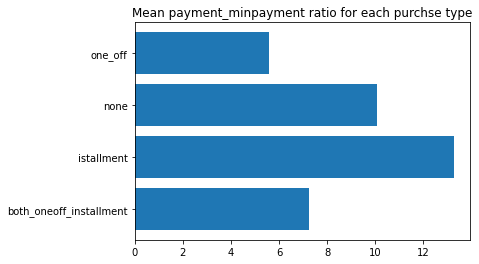

In [36]:
fig,ax=plt.subplots()
ax.barh(y=range(len(x)), width=x.values,align='center')
ax.set(yticks= np.arange(len(x)),yticklabels = x.index);
plt.title('Mean payment_minpayment ratio for each purchse type')


In [37]:
credit.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_avg_purchase,Monthly_cash_advance,limit_usage,payment_minpay
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,...,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,...,14.709832,4494.282473,1733.143852,844.906767,0.153715,11.517318,86.175173,88.977984,0.388884,9.059164
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,...,24.857649,3638.646702,2895.063757,2332.792322,0.292499,1.338331,180.508787,193.136115,0.389722,118.180526
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,...,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000,3.399375,0.000000,0.041494,0.913275
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,...,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000,31.936667,0.000000,0.302720,2.032717
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,...,17.000000,6500.000000,1901.134317,788.713501,0.142857,12.000000,97.228333,99.085196,0.717571,6.052729
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,...,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000,4086.630833,3928.100980,15.909951,6840.528861


#### customers with installment purchases are paying dues 

In [38]:
credit[credit['purchase_type']=='n']

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_avg_purchase,Monthly_cash_advance,purchase_type,limit_usage,payment_minpay


Text(0.5, 1.0, 'Average cash advance taken by customers of different Purchase type : Both, None,Installment,One_Off')

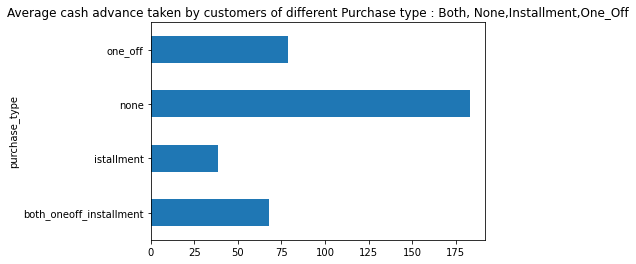

In [39]:
credit.groupby('purchase_type').apply(lambda x: np.mean(x['Monthly_cash_advance'])).plot.barh()

plt.title('Average cash advance taken by customers of different Purchase type : Both, None,Installment,One_Off')

#### Customers who don't do either one-off or installment purchases take more cash on advance

<AxesSubplot:ylabel='purchase_type'>

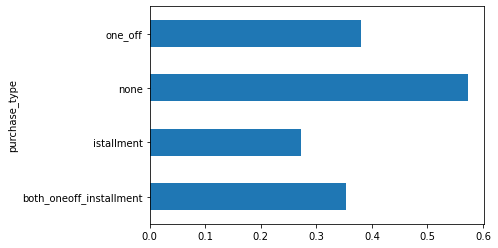

In [40]:
credit.groupby('purchase_type').apply(lambda x: np.mean(x['limit_usage'])).plot.barh()

#### Original dataset with categorical column converted to number type.

In [41]:
cre_original=pd.concat([credit,pd.get_dummies(credit['purchase_type'])],axis=1)

### Preparing Machine learning algorithm

***We do have some categorical data which need to convert with the help of dummy creation***

In [42]:
# creating Dummies for categorical variable
cr_pre['purchase_type']=credit.loc[:,'purchase_type']
pd.get_dummies(cr_pre['purchase_type'])

,both_oneoff_installment,istallment,none,one_off
0,0,1,0,0
1,0,0,1,0
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
...,...,...,...,...
8945,0,1,0,0
8946,0,1,0,0
8947,0,1,0,0
8948,0,0,1,0


#### Now merge the created dummy with the original data frame

In [43]:
cr_dummy=pd.concat([cr_pre,pd.get_dummies(cr_pre['purchase_type'])],axis=1)

In [44]:
l=['purchase_type']

In [45]:
cr_dummy=cr_dummy.drop(l,axis=1)
cr_dummy.isnull().any()

BALANCE_FREQUENCY                   False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
Monthly_avg_purchase                False
Monthly_cash_advance                False
limit_usage                         False
payment_minpay                      False
both_oneoff_installment             False
istallment                          False
none                                False
one_off                             False
dtype: bool

In [46]:
cr_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE_FREQUENCY                 8950 non-null   float64
 1   ONEOFF_PURCHASES                  8950 non-null   float64
 2   INSTALLMENTS_PURCHASES            8950 non-null   float64
 3   PURCHASES_FREQUENCY               8950 non-null   float64
 4   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 5   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 6   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 7   CASH_ADVANCE_TRX                  8950 non-null   float64
 8   PURCHASES_TRX                     8950 non-null   float64
 9   Monthly_avg_purchase              8950 non-null   float64
 10  Monthly_cash_advance              8950 non-null   float64
 11  limit_usage                       8950 non-null   float64
 12  paymen

In [47]:
cr_dummy.head(3)

,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,Monthly_avg_purchase,Monthly_cash_advance,limit_usage,payment_minpay,both_oneoff_installment,istallment,none,one_off
0,0.597837,0.000000,4.568506,0.154151,0.000000,0.080042,0.000000,0.000000,1.098612,2.191654,0.000000,0.040086,0.894662,0,1,0,0
1,0.646627,0.000000,0.000000,0.000000,0.000000,0.000000,0.223144,1.609438,0.000000,0.000000,6.287695,0.376719,1.574068,0,0,1,0
2,0.693147,6.651791,0.000000,0.693147,0.693147,0.000000,0.000000,0.000000,2.564949,4.180994,0.000000,0.287197,0.688979,0,0,0,1


<AxesSubplot:>

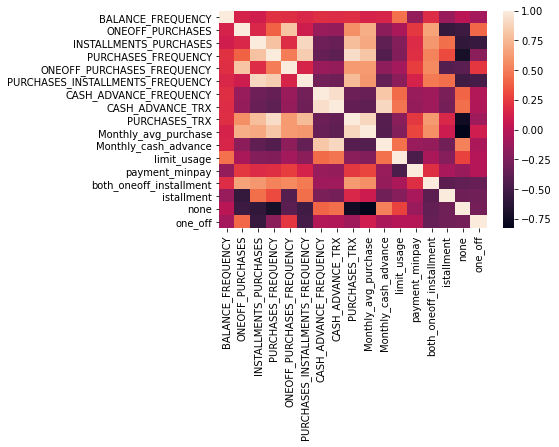

In [48]:
sns.heatmap(cr_dummy.corr())

<big>
- Heat map shows that many features are co-related so applying dimensionality reduction will help negating multi-colinearity in data
</big>


- Before applying PCA we will standardize data  to avoid effect of scale on our result. Centering and Scaling will make all features with equal weight.

### Standardrizing data 
- To put data on the same scale 

In [49]:
from sklearn.preprocessing import  StandardScaler

In [50]:
sc=StandardScaler()

In [51]:
cr_dummy.shape

(8950, 17)

In [52]:
cr_scaled=sc.fit_transform(cr_dummy)

In [53]:
cr_scaled

array([[-0.14875746, -0.98708958,  0.39447984, ...,  1.72051649,
        -0.54369045, -0.514625  ],
       [ 0.17961568, -0.98708958, -1.08745376, ..., -0.58122082,
         1.83928189, -0.514625  ],
       [ 0.49271003,  1.06202168, -1.08745376, ..., -0.58122082,
        -0.54369045,  1.94316249],
       ...,
       [-0.09290575, -0.98708958,  0.52779444, ...,  1.72051649,
        -0.54369045, -0.514625  ],
       [-0.09290575, -0.98708958, -1.08745376, ..., -0.58122082,
         1.83928189, -0.514625  ],
       [-0.73437135,  1.16861854, -1.08745376, ..., -0.58122082,
        -0.54369045,  1.94316249]])

### Applying PCA

**With the help of principal component analysis we will reduce features**

In [54]:
from sklearn.decomposition import PCA

In [55]:
cr_dummy.shape

(8950, 17)

In [56]:
#We have 17 features so our n_component will be 17.
pc=PCA(n_components=17)
cr_pca=pc.fit(cr_scaled)

In [57]:
#Lets check if we will take 17 component then how much varience it explain. Ideally it should be 1 i.e 100%
sum(cr_pca.explained_variance_ratio_)

1.0

In [58]:
var_ratio={}
for n in range(2,18):
    pc=PCA(n_components=n)
    cr_pca=pc.fit(cr_scaled)
    var_ratio[n]=sum(cr_pca.explained_variance_ratio_)

In [59]:
var_ratio

{2: 0.5826439793960282,
 3: 0.7299379309512696,
 4: 0.811544276235126,
 5: 0.8770555795291433,
 6: 0.918649244351261,
 7: 0.9410925256030133,
 8: 0.9616114053683054,
 9: 0.9739787081990645,
 10: 0.9835896584630707,
 11: 0.9897248107341954,
 12: 0.9927550009135228,
 13: 0.9953907562385423,
 14: 0.9979616898169595,
 15: 0.9996360473172956,
 16: 1.0,
 17: 1.0}

***Since 6 components are explaining about 90% variance so we select 5 components***

In [60]:
pc=PCA(n_components=6)

In [61]:
p=pc.fit(cr_scaled)

In [62]:
cr_scaled.shape

(8950, 17)

In [63]:
p.explained_variance_

array([6.83574755, 3.07030693, 2.50427698, 1.38746289, 1.1138166 ,
       0.70717132])

In [64]:
np.sum(p.explained_variance_)

15.6187822693088

In [65]:
np.sum(p.explained_variance_)

15.6187822693088

In [66]:
var_ratio

{2: 0.5826439793960282,
 3: 0.7299379309512696,
 4: 0.811544276235126,
 5: 0.8770555795291433,
 6: 0.918649244351261,
 7: 0.9410925256030133,
 8: 0.9616114053683054,
 9: 0.9739787081990645,
 10: 0.9835896584630707,
 11: 0.9897248107341954,
 12: 0.9927550009135228,
 13: 0.9953907562385423,
 14: 0.9979616898169595,
 15: 0.9996360473172956,
 16: 1.0,
 17: 1.0}

<AxesSubplot:>

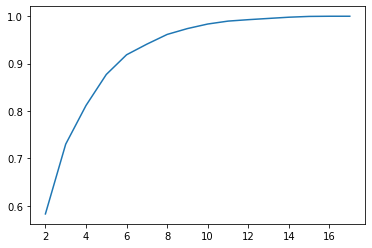

In [67]:
pd.Series(var_ratio).plot()

***Since 5 components are explaining about 87% variance so we select 5 components***

In [68]:
cr_scaled.shape

(8950, 17)

In [69]:
pc_final=PCA(n_components=6).fit(cr_scaled)

reduced_cr=pc_final.fit_transform(cr_scaled)

In [70]:
dd=pd.DataFrame(reduced_cr)

In [71]:
dd.head()

,0,1,2,3,4,5
0,-0.242841,-2.759668,0.343061,-0.417359,-0.007100,0.019755
1,-3.975652,0.144625,-0.542989,1.023832,-0.428929,-0.572463
2,1.287396,1.508938,2.709966,-1.892252,0.010809,-0.599932
3,-1.047613,0.673103,2.501794,-1.306784,0.761348,1.408986
4,-1.451586,-0.176336,2.286074,-1.624896,-0.561969,-0.675214


***So initially we had 17 variables now its 5 so our variable go reduced***

In [72]:
dd.shape

(8950, 6)

In [73]:
col_list=cr_dummy.columns

In [74]:
col_list

Index(['BALANCE_FREQUENCY', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'Monthly_avg_purchase',
       'Monthly_cash_advance', 'limit_usage', 'payment_minpay',
       'both_oneoff_installment', 'istallment', 'none', 'one_off'],
      dtype='object')

In [75]:
pd.DataFrame(pc_final.components_.T, columns=['PC_' +str(i) for i in range(6)],index=col_list)

,PC_0,PC_1,PC_2,PC_3,PC_4,PC_5
BALANCE_FREQUENCY,0.029707,0.240072,-0.263140,-0.353549,-0.228681,-0.693816
ONEOFF_PURCHASES,0.214107,0.406078,0.239165,0.001520,-0.023197,0.129094
INSTALLMENTS_PURCHASES,0.312051,-0.098404,-0.315625,0.087983,-0.002181,0.115223
PURCHASES_FREQUENCY,0.345823,0.015813,-0.162843,-0.074617,0.115948,-0.081879
ONEOFF_PURCHASES_FREQUENCY,0.214702,0.362208,0.163222,0.036303,-0.051279,-0.097299
PURCHASES_INSTALLMENTS_FREQUENCY,0.295451,-0.112002,-0.330029,0.023502,0.025871,0.006731
CASH_ADVANCE_FREQUENCY,-0.214336,0.286074,-0.278586,0.096353,0.360132,0.066589
CASH_ADVANCE_TRX,-0.229393,0.291556,-0.285089,0.103484,0.332753,0.082307
PURCHASES_TRX,0.355503,0.106625,-0.102743,-0.054296,0.104971,-0.009402
Monthly_avg_purchase,0.345992,0.141635,0.023986,-0.079373,0.194147,0.015878


#### So above data gave us eigen vector for each component we had all eigen vector value very small we can remove those variable bur in our case its not.

In [76]:
# Factor Analysis : variance explained by each component- 
pd.Series(pc_final.explained_variance_ratio_,index=['PC_'+ str(i) for i in range(6)])

PC_0    0.402058
PC_1    0.180586
PC_2    0.147294
PC_3    0.081606
PC_4    0.065511
PC_5    0.041594
dtype: float64

### Clustering

**Based on the intuition on type of purchases made by customers and their distinctive behavior exhibited based on the purchase_type (as visualized above in Insights from KPI) , I am starting with 4 clusters.**

In [77]:
from sklearn.cluster import KMeans

In [78]:
km_4=KMeans(n_clusters=4,random_state=123)

In [79]:
km_4.fit(reduced_cr)

KMeans(n_clusters=4, random_state=123)

In [80]:
km_4.labels_

array([2, 1, 0, ..., 2, 1, 0])

In [81]:
pd.Series(km_4.labels_).value_counts()

3    2769
2    2224
1    2088
0    1869
dtype: int64

***Here we donot have known k value so we will find the K. To do that we need to take a cluster range between 1 and 21.*** 

### Identify cluster Error.

In [82]:
cluster_range = range( 1, 21 )
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit( reduced_cr )
    cluster_errors.append( clusters.inertia_ )# clusters.inertia_ is basically cluster error here.

In [83]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

clusters_df[0:21]

,num_clusters,cluster_errors
0,1,139772.482528
1,2,93307.255901
2,3,70747.695551
3,4,49446.066485
4,5,42548.478426
5,6,37712.952211
6,7,34124.614172
7,8,31164.894649
8,9,28867.582715
9,10,26302.904538


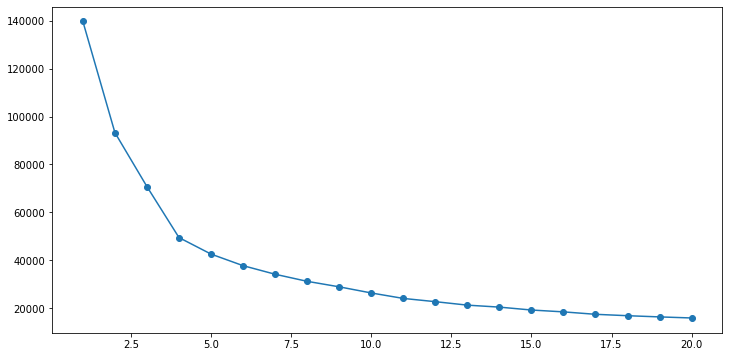

In [84]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

***From above graph we will find elbow range. here it is 4,5,6***

### Silhouette Coefficient

In [85]:
from sklearn import metrics

In [86]:
# calculate SC for K=3 through K=12
k_range = range(2, 21)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(reduced_cr)
    scores.append(metrics.silhouette_score(reduced_cr, km.labels_))

In [87]:
scores

[0.33194521792342657,
 0.35401650944838786,
 0.43708577439659485,
 0.4312114520971777,
 0.42281449146537453,
 0.40258428762759707,
 0.41445372986226175,
 0.3889287962123451,
 0.39299913554746213,
 0.3678798374268568,
 0.3669766371659528,
 0.34010431910388955,
 0.3527163657041251,
 0.343964162296631,
 0.33369567078514206,
 0.3222956561386571,
 0.3322743918699832,
 0.3272950756025998,
 0.3239792346891927]

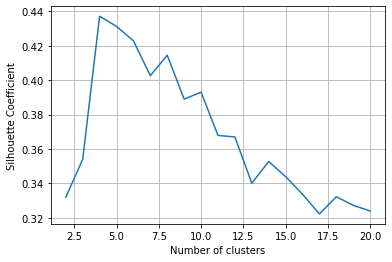

In [88]:
# plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

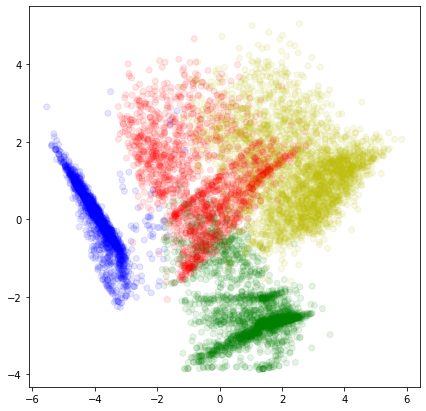

In [89]:
color_map={0:'r',1:'b',2:'g',3:'y'}
label_color=[color_map[l] for l in km_4.labels_]
plt.figure(figsize=(7,7))
plt.scatter(reduced_cr[:,0],reduced_cr[:,1],c=label_color,cmap='Spectral',alpha=0.1)

***It is very difficult to draw iddividual plot for cluster, so we will use pair plot which will provide us all graph in one shot. To do that we need to take following steps***

In [90]:
df_pair_plot=pd.DataFrame(reduced_cr,columns=['PC_' +str(i) for i in range(6)])

In [91]:
df_pair_plot['Cluster']=km_4.labels_ #Add cluster column in the data frame

In [92]:
df_pair_plot.head()

,PC_0,PC_1,PC_2,PC_3,PC_4,PC_5,Cluster
0,-0.242841,-2.759668,0.343061,-0.417359,-0.007100,0.019755,2
1,-3.975652,0.144625,-0.542989,1.023832,-0.428929,-0.572463,1
2,1.287396,1.508938,2.709966,-1.892252,0.010809,-0.599932,0
3,-1.047613,0.673103,2.501794,-1.306784,0.761348,1.408986,0
4,-1.451586,-0.176336,2.286074,-1.624896,-0.561969,-0.675214,0


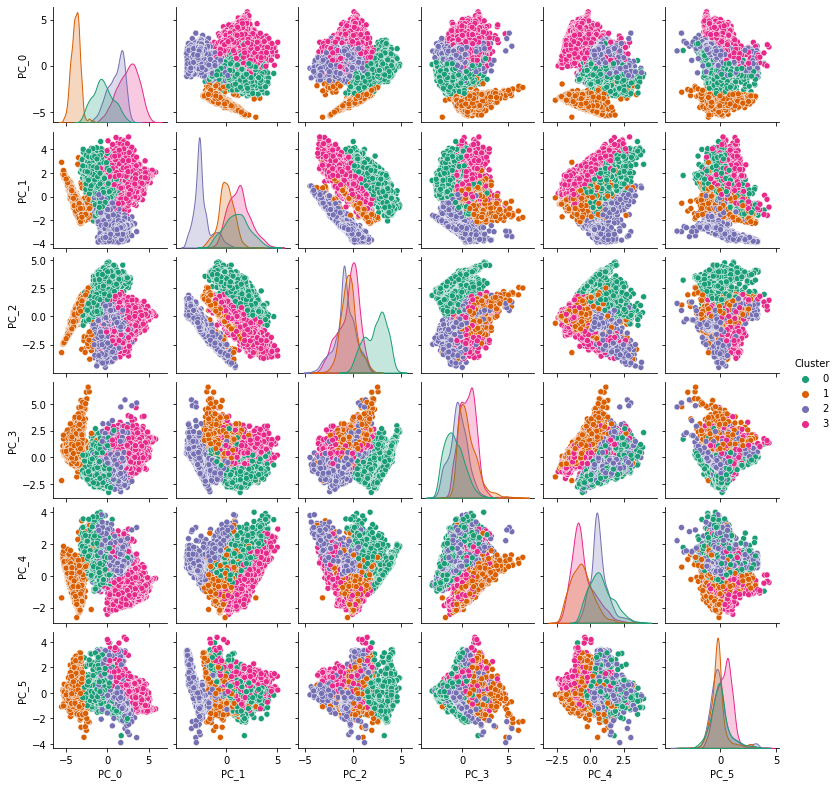

In [93]:
#pairwise relationship of components on the data
sns.pairplot(df_pair_plot,hue='Cluster', palette= 'Dark2', diag_kind='kde',size=1.85)

***It shows that first two components are able to indentify clusters***

#### Now we have done here with priciple component now we need to come bring our original data frame and we will merge the cluster with them. 

***To interprate result we need to use our data frame***

In [94]:
# Key performace variable selection . here i am taking varibales which we will use in derving new KPI. 
#We can take all 17 variables but it will be difficult to interprate.So are are selecting less no of variables.

col_kpi=['PURCHASES_TRX','Monthly_avg_purchase','Monthly_cash_advance','limit_usage','CASH_ADVANCE_TRX',
         'payment_minpay','both_oneoff_installment','istallment','one_off','none','CREDIT_LIMIT']

In [95]:
cr_pre.describe()

,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,Monthly_avg_purchase,Monthly_cash_advance,limit_usage,payment_minpay
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,0.619940,3.204274,3.352403,0.361268,0.158699,0.270072,0.113512,0.817570,1.894731,3.050877,2.163970,0.296081,1.357600
std,0.148590,3.246365,3.082973,0.277317,0.216672,0.281852,0.156716,1.009316,1.373856,2.002823,2.429741,0.250303,0.940149
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.635989,0.000000,0.000000,0.080042,0.000000,0.000000,0.000000,0.000000,0.693147,1.481458,0.000000,0.040656,0.648817
50%,0.693147,3.663562,4.499810,0.405465,0.080042,0.154151,0.000000,0.000000,2.079442,3.494587,0.000000,0.264455,1.109459
75%,0.693147,6.360274,6.151961,0.650588,0.262364,0.559616,0.200671,1.609438,2.890372,4.587295,4.606022,0.540911,1.953415
max,0.693147,10.615512,10.021315,0.693147,0.693147,0.693147,0.916291,4.820282,5.883322,8.315721,8.276166,2.827902,8.830767


In [96]:
# Conactenating labels found through Kmeans with data 
cluster_df_4=pd.concat([cre_original[col_kpi],pd.Series(km_4.labels_,name='Cluster_4')],axis=1)

In [97]:
cluster_df_4.head()

,PURCHASES_TRX,Monthly_avg_purchase,Monthly_cash_advance,limit_usage,CASH_ADVANCE_TRX,payment_minpay,both_oneoff_installment,istallment,one_off,none,CREDIT_LIMIT,Cluster_4
0,2,7.950000,0.000000,0.040901,0,1.446508,0,1,0,0,1000.0,2
1,0,0.000000,536.912124,0.457495,4,3.826241,0,0,0,1,7000.0,1
2,12,64.430833,0.000000,0.332687,0,0.991682,0,0,1,0,7500.0,0
3,1,124.916667,17.149001,0.222223,1,0.000000,0,0,1,0,7500.0,0
4,1,1.333333,0.000000,0.681429,0,2.771075,0,0,1,0,1200.0,0


In [98]:
# Mean value gives a good indication of the distribution of data. So we are finding mean value for each variable for each cluster
cluster_4=cluster_df_4.groupby('Cluster_4')\
.apply(lambda x: x[col_kpi].mean()).T
cluster_4

Cluster_4,0,1,2,3
PURCHASES_TRX,7.127341,0.043582,12.062050,33.013723
Monthly_avg_purchase,69.875917,0.148297,47.626256,193.008043
Monthly_cash_advance,78.098613,186.281319,33.550080,67.466910
limit_usage,0.379761,0.576076,0.264745,0.353591
CASH_ADVANCE_TRX,2.881220,6.540230,1.021133,2.804261
payment_minpay,5.573672,9.936617,13.422420,7.245651
both_oneoff_installment,0.000535,0.001916,0.000000,1.000000
istallment,0.000000,0.017241,1.000000,0.000000
one_off,0.999465,0.002874,0.000000,0.000000
none,0.000000,0.977969,0.000000,0.000000


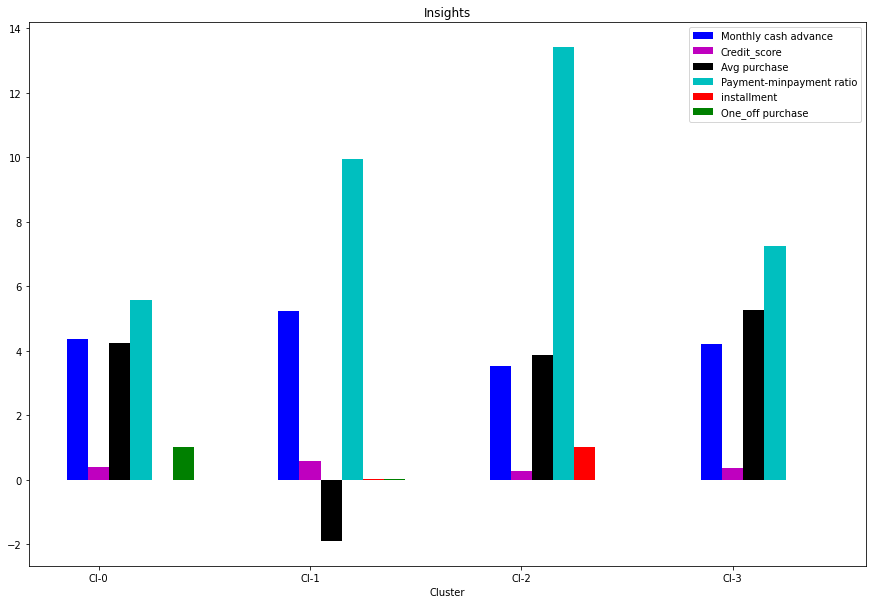

In [99]:
fig,ax=plt.subplots(figsize=(15,10))
index=np.arange(len(cluster_4.columns))

cash_advance=np.log(cluster_4.loc['Monthly_cash_advance',:].values)
credit_score=(cluster_4.loc['limit_usage',:].values)
purchase= np.log(cluster_4.loc['Monthly_avg_purchase',:].values)
payment=cluster_4.loc['payment_minpay',:].values
installment=cluster_4.loc['istallment',:].values
one_off=cluster_4.loc['one_off',:].values


bar_width=.10
b1=plt.bar(index,cash_advance,color='b',label='Monthly cash advance',width=bar_width)
b2=plt.bar(index+bar_width,credit_score,color='m',label='Credit_score',width=bar_width)
b3=plt.bar(index+2*bar_width,purchase,color='k',label='Avg purchase',width=bar_width)
b4=plt.bar(index+3*bar_width,payment,color='c',label='Payment-minpayment ratio',width=bar_width)
b5=plt.bar(index+4*bar_width,installment,color='r',label='installment',width=bar_width)
b6=plt.bar(index+5*bar_width,one_off,color='g',label='One_off purchase',width=bar_width)

plt.xlabel("Cluster")
plt.title("Insights")
plt.xticks(index + bar_width, ('Cl-0', 'Cl-1', 'Cl-2', 'Cl-3'))
plt.legend()

**Insights**

#### Clusters are clearly distinguishing behavior within customers




<big>


- Cluster 2 is the group of customers who have highest Monthly_avg purchases and doing both installment as well as one_off   purchases, have comparatively good credit score. *** This group is about 31% of the total customer base ***
 

 
- cluster 1 is taking maximum advance_cash  and   is paying comparatively less minimum payment and poor credit_score & doing no purchase transaction. *** This group is about 23% of the total customer base ***



- Cluster 0 customers are doing maximum One_Off transactions  and  least payment ratio. *** This group is about 21% of the total customer base ***



- Cluster 3 customers have maximum credit score and  are paying dues and are doing maximum installment purchases. *** This group is about 25% of the total customer base ***


---



In [100]:
# Percentage of each cluster in the total customer base
s=cluster_df_4.groupby('Cluster_4').apply(lambda x: x['Cluster_4'].value_counts())
print (s),'\n'

per=pd.Series((s.values.astype('float')/ cluster_df_4.shape[0])*100,name='Percentage')
print ("Cluster -4 "),'\n'
print (pd.concat([pd.Series(s.values,name='Size'),per],axis=1))

Cluster_4   
0          0    1869
1          1    2088
2          2    2224
3          3    2769
Name: Cluster_4, dtype: int64
Cluster -4 
   Size  Percentage
0  1869   20.882682
1  2088   23.329609
2  2224   24.849162
3  2769   30.938547


#### Finding behaviour with 5 Clusters:

In [101]:
km_5=KMeans(n_clusters=5,random_state=123)
km_5=km_5.fit(reduced_cr)
km_5.labels_

array([4, 2, 0, ..., 4, 2, 0])

In [102]:
pd.Series(km_5.labels_).value_counts()

4    2149
2    2081
1    1977
0    1862
3     881
dtype: int64

Text(0, 0.5, 'PC_1')

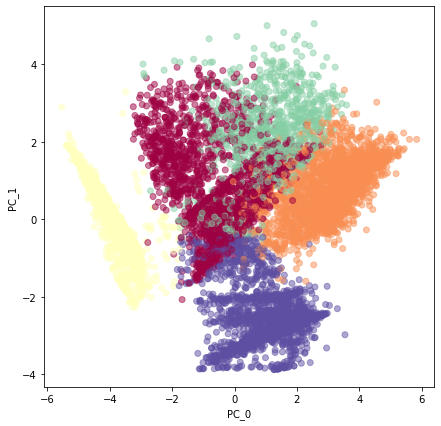

In [103]:
plt.figure(figsize=(7,7))
plt.scatter(reduced_cr[:,0],reduced_cr[:,1],c=km_5.labels_,cmap='Spectral',alpha=0.5)
plt.xlabel('PC_0')
plt.ylabel('PC_1')

In [104]:
cluster_df_5=pd.concat([cre_original[col_kpi],pd.Series(km_5.labels_,name='Cluster_5')],axis=1)

In [105]:
# Finding Mean of features for each cluster
cluster_df_5.groupby('Cluster_5')\
.apply(lambda x: x[col_kpi].mean()).T

Cluster_5,0,1,2,3,4
PURCHASES_TRX,7.096670,34.587759,0.032196,27.703746,11.905537
Monthly_avg_purchase,68.917645,210.536468,0.086126,141.584086,47.369817
Monthly_cash_advance,74.517541,4.040708,185.038534,249.942101,20.636870
limit_usage,0.377959,0.258931,0.576110,0.600096,0.250011
CASH_ADVANCE_TRX,2.697637,0.152757,6.448823,10.384790,0.550489
payment_minpay,5.562287,8.675499,9.963172,3.651686,13.783426
both_oneoff_installment,0.002148,1.000000,0.000000,0.900114,0.000000
istallment,0.000000,0.000000,0.015858,0.088536,1.000000
one_off,0.997852,0.000000,0.002883,0.011351,0.000000
none,0.000000,0.000000,0.981259,0.000000,0.000000


### Conclusion With 5 clusters : 

- we have a group of customers (cluster 2) having highest avergae purchases but there is Cluster 4 also having highest cash advance & secong highest purchase behaviour but their type of purchases are same.

- Cluster 0 and Cluster 4 are behaving similar in terms of Credit_limit and have cash transactions is on higher side


---
 
<big>

***So we don't have quite distinguishable characteristics with 5 clusters,***

In [106]:

s1=cluster_df_5.groupby('Cluster_5').apply(lambda x: x['Cluster_5'].value_counts())
print (s1)

Cluster_5   
0          0    1862
1          1    1977
2          2    2081
3          3     881
4          4    2149
Name: Cluster_5, dtype: int64


In [107]:
# percentage of each cluster

print ("Cluster-5"),'\n'
per_5=pd.Series((s1.values.astype('float')/ cluster_df_5.shape[0])*100,name='Percentage')
print (pd.concat([pd.Series(s1.values,name='Size'),per_5],axis=1))

Cluster-5
   Size  Percentage
0  1862   20.804469
1  1977   22.089385
2  2081   23.251397
3   881    9.843575
4  2149   24.011173


### Finding behavior with 6 clusters

In [108]:
km_6=KMeans(n_clusters=6).fit(reduced_cr)
km_6.labels_

array([2, 0, 3, ..., 2, 0, 4])

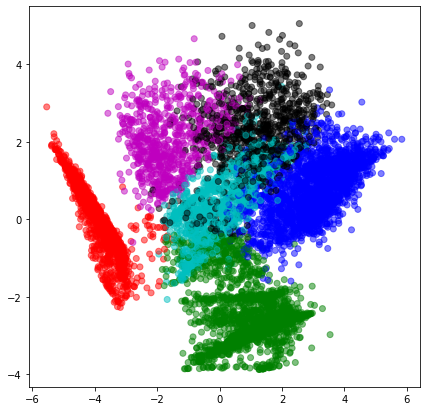

In [109]:
color_map={0:'r',1:'b',2:'g',3:'c',4:'m',5:'k'}
label_color=[color_map[l] for l in km_6.labels_]
plt.figure(figsize=(7,7))
plt.scatter(reduced_cr[:,0],reduced_cr[:,1],c=label_color,cmap='Spectral',alpha=0.5)


In [110]:
cluster_df_6 = pd.concat([cre_original[col_kpi],pd.Series(km_6.labels_,name='Cluster_6')],axis=1)

In [111]:
six_cluster=cluster_df_6.groupby('Cluster_6').apply(lambda x: x[col_kpi].mean()).T
six_cluster

Cluster_6,0,1,2,3,4,5
PURCHASES_TRX,0.029398,34.652439,11.905537,7.760135,5.957082,27.953143
Monthly_avg_purchase,0.078945,211.137209,47.369817,78.685651,53.803802,140.589204
Monthly_cash_advance,184.574967,4.007851,20.636870,3.707133,206.630108,242.628712
limit_usage,0.575675,0.258170,0.250011,0.245802,0.607014,0.600342
CASH_ADVANCE_TRX,6.414458,0.149898,0.550489,0.130912,7.713877,9.990857
payment_minpay,9.980891,8.706031,13.783426,6.910361,3.246539,3.615910
both_oneoff_installment,0.000000,1.000000,0.000000,0.006757,0.000000,0.912000
istallment,0.015904,0.000000,1.000000,0.000000,0.001431,0.088000
one_off,0.000000,0.000000,0.000000,0.993243,0.998569,0.000000
none,0.984096,0.000000,0.000000,0.000000,0.000000,0.000000


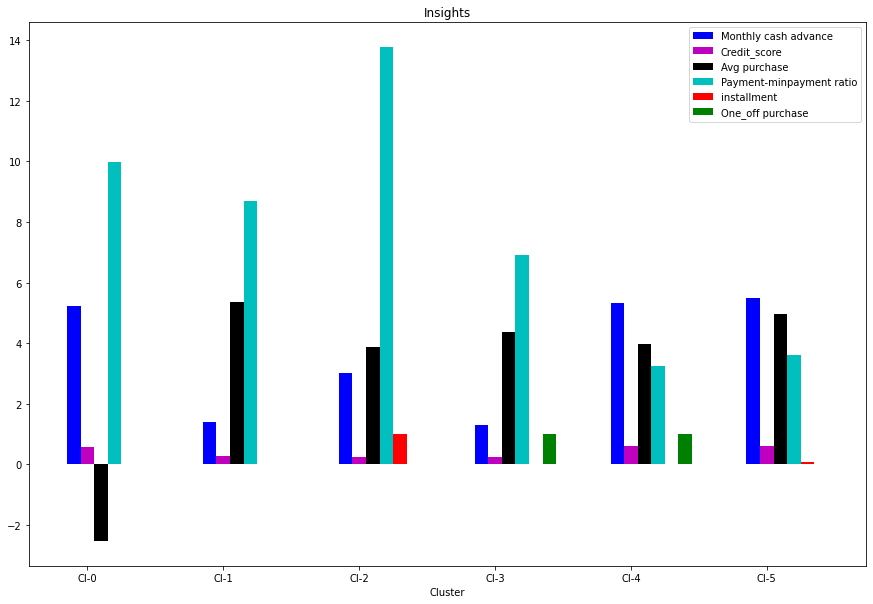

In [112]:
fig,ax=plt.subplots(figsize=(15,10))
index=np.arange(len(six_cluster.columns))

cash_advance=np.log(six_cluster.loc['Monthly_cash_advance',:].values)
credit_score=(six_cluster.loc['limit_usage',:].values)
purchase= np.log(six_cluster.loc['Monthly_avg_purchase',:].values)
payment=six_cluster.loc['payment_minpay',:].values
installment=six_cluster.loc['istallment',:].values
one_off=six_cluster.loc['one_off',:].values

bar_width=.10
b1=plt.bar(index,cash_advance,color='b',label='Monthly cash advance',width=bar_width)
b2=plt.bar(index+bar_width,credit_score,color='m',label='Credit_score',width=bar_width)
b3=plt.bar(index+2*bar_width,purchase,color='k',label='Avg purchase',width=bar_width)
b4=plt.bar(index+3*bar_width,payment,color='c',label='Payment-minpayment ratio',width=bar_width)
b5=plt.bar(index+4*bar_width,installment,color='r',label='installment',width=bar_width)
b6=plt.bar(index+5*bar_width,one_off,color='g',label='One_off purchase',width=bar_width)

plt.xlabel("Cluster")
plt.title("Insights")
plt.xticks(index + bar_width, ('Cl-0', 'Cl-1', 'Cl-2', 'Cl-3','Cl-4','Cl-5'))

plt.legend()

In [113]:
cash_advance=np.log(six_cluster.loc['Monthly_cash_advance',:].values)
credit_score=list(six_cluster.loc['limit_usage',:].values)
cash_advance

array([5.21805571, 1.38825514, 3.02707927, 1.31025873, 5.33093028,
       5.49153234])

### Conclusion with  6 clusters:

- Here also groups are overlapping.
     - Cl-0 and Cl-2 behaving same 

**Performance metrics also suggest that  K-means with 4 cluster is able to show distinguished characteristics of each cluster.**




***Insights with 4 Clusters***



- Cluster 2 is the group of customers who have highest Monthly_avg purchases and doing both installment as well as one_off   purchases, have comparatively good credit score. ***This group is about 31% of the total customer base ***
 

 
- cluster 1 is taking maximum advance_cash  and   is paying comparatively less minimum payment and poor credit_score & doing no purchase transaction. ***This group is about 23% of the total customer base***



- Cluster 0 customers are doing maximum One_Off transactions  and  least payment ratio and credit_score on lower side ***This group is about 21% of the total customer base***



- Cluster 3 customers have maximum credit score and  are paying dues and are doing maximum installment purchases.*** This group is about 25% of the total customer base***



### Marketing Strategy Suggested:

#### a. Group 2
   - They are potential target customers who are paying dues and doing purchases and maintaining comparatively good credit score )
       --    we can increase credit limit or can lower down interest rate
       --    Can be given premium card /loyality cards to increase transactions
       
#### b. Group 1
   - They have poor credit score and taking only cash on advance. We can target them by providing  less interest rate on purchase transaction
   
#### c. Group 0
   - This group is has minimum paying ratio and using card for just oneoff transactions (may be for utility bills only). This group seems to be risky group.
   
#### d. Group 3
  - This group is performing best among all as cutomers are maintaining good credit score and paying dues on time.
      -- Giving rewards point will make them perform more purchases.
       